# Project 7: Machine Learning
Trent Rueckert - October 8th, 2024

https://github.com/trentrueckert/datafun-07-ml

## Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

Create a lambda to calculate Celsius equivalents of Fahrenheit temperatures 0-100 in 10-degree increments

In [6]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Put the data in a dataframe using pandas then display the temperatures

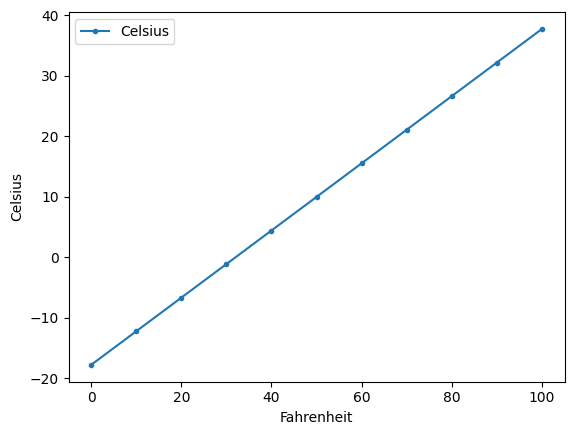

In [7]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Load the data into a dataframe

In [8]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
Inspect the data with head and tail

In [9]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [10]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Rename the 'Value' column as 'Temperature'

In [13]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Check the column type

In [14]:
nyc_df.Date.dtype

dtype('int64')

Divide by 100 to truncate the last two digits

In [15]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
For basic descriptive statistics call describe on the Temperature column

In [17]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Use stats from scipy and linregress to calculate slope and intercept

In [18]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

Slope

In [19]:
linear_regression.slope

np.float64(0.014771361132966163)

Intercept

In [20]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
Predict the average high temperature for January of 2024

In [21]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

Predict the average high temperature for January of 1890 (before the file tracks)

In [22]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations
Plot the average high temperatures with a regression line

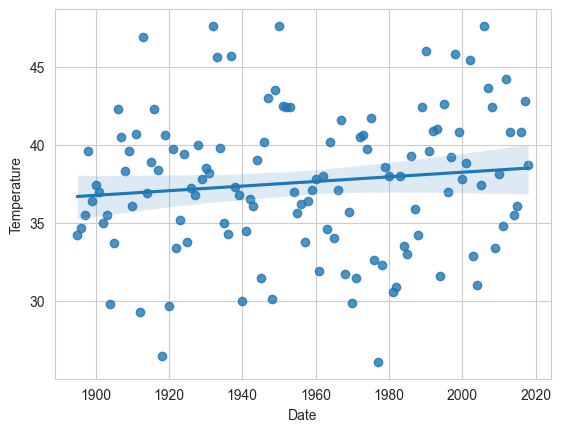

In [23]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)